# Importing libraries

In [ ]:
import nltk
import pandas as pd
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.

True

# For Jews dataset

In [ ]:
jews=pd.read_csv("/content/jews.csv")

In [ ]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
jews_word = basic_clean(''.join(str(jews['message'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(jews_word, 2)).value_counts())[:5]

(prime, minister)       22
(social, medium)        19
(jewish, people)        19
(new, york)             17
(ultraorthodox, jew)    16
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(jews_word, 3)).value_counts())[:5]

(prime, minister, benjamin)        12
(social, medium, post)             11
(minister, benjamin, netanyahu)     9
(six, million, jew)                 8
(marjorie, taylor, greene)          8
dtype: int64

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(jews_word, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(jews_word, 3)).value_counts())[:20]

## Bigram

Text(0.5, 0, 'Word Frequency')

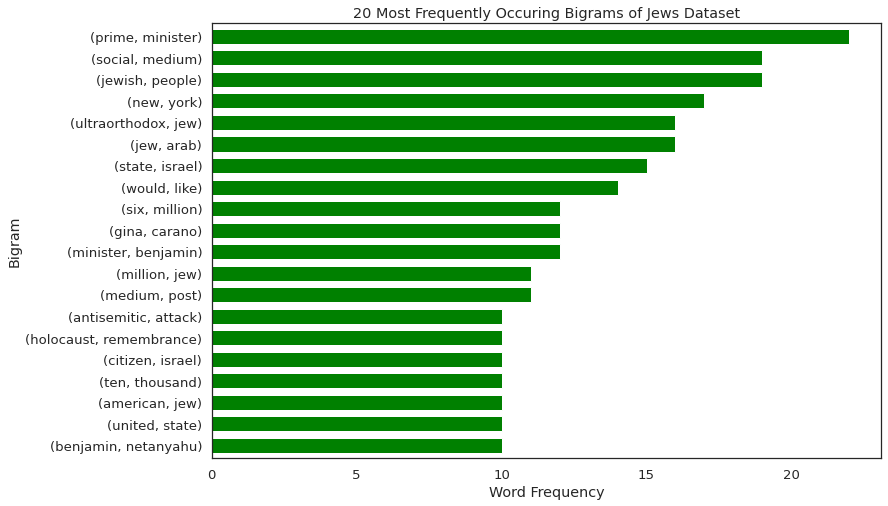

In [ ]:
bigrams_series.sort_values().plot.barh(color='green', width=.7, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams of Jews Dataset')
plt.ylabel('Bigram')
plt.xlabel('Word Frequency')

## Trigram

Text(0.5, 0, 'Word Frequency')

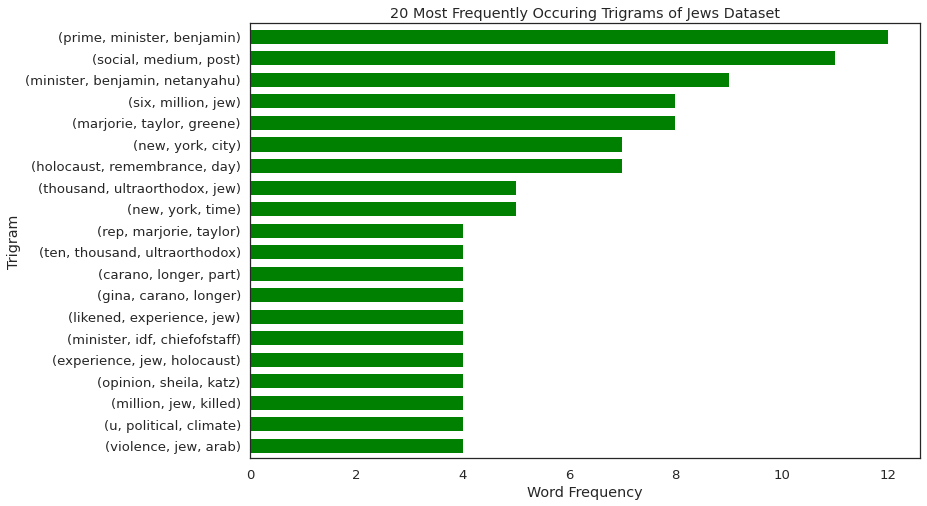

In [ ]:
trigrams_series.sort_values().plot.barh(color='green', width=.7, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams of Jews Dataset')
plt.ylabel('Trigram')
plt.xlabel('Word Frequency')

## Top common words

In [ ]:
#cleaning the texts
import re
jews_corpus=[]
for i in range(len(jews)):
    review=re.sub('[^a-zA-Z0-9]',' ',jews['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    review=' '.join(review)
    jews_corpus.append(review)


In [ ]:
common_word_df = pd.DataFrame(jews_corpus, columns =['message']) 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

def wordBarGraphFunction(df,column,title):
    
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.ylabel('word')
    plt.xlabel('Word Frequency')
    plt.show()


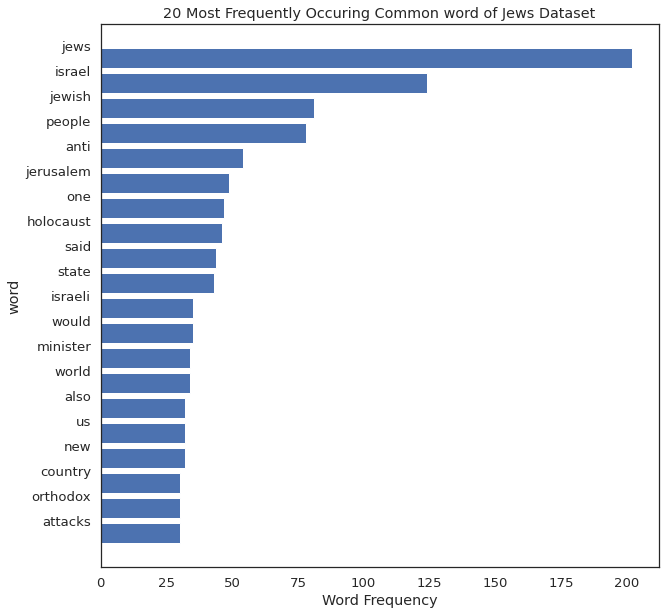

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(common_word_df,'message',"20 Most Frequently Occuring Common word of Jews Dataset")

# For Chinese Dataset

In [ ]:
chinese=pd.read_csv("/content/chinese.csv")

In [ ]:
chinese_word = basic_clean(''.join(str(chinese['message'].tolist())))


In [ ]:
(pd.Series(nltk.ngrams(chinese_word, 2)).value_counts())[:5]


(chinese, government)    188
(communist, party)       128
(chinese, communist)     116
(hong, kong)             113
(chinese, official)       98
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(chinese_word, 3)).value_counts())[:5]


(chinese, communist, party)      98
(chinese, president, xi)         54
(world, health, organization)    53
(president, xi, jinping)         52
(president, joe, biden)          38
dtype: int64

In [ ]:
chinese_bigrams_series = (pd.Series(nltk.ngrams(chinese_word, 2)).value_counts())[:20]


In [ ]:
chinese_trigrams_series = (pd.Series(nltk.ngrams(chinese_word, 3)).value_counts())[:20]


## Bigram

Text(0.5, 0, 'Word Frequency')

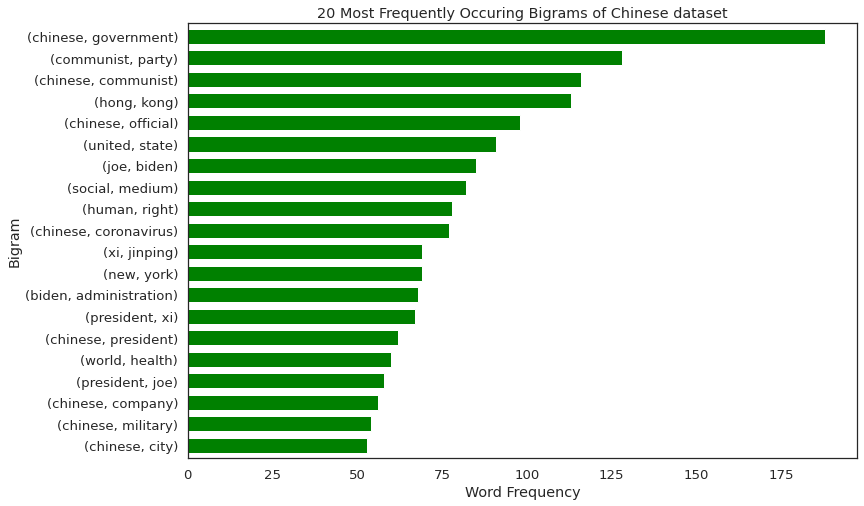

In [ ]:
chinese_bigrams_series.sort_values().plot.barh(color='green', width=.7, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams of Chinese dataset')
plt.ylabel('Bigram')
plt.xlabel('Word Frequency')


## Trigram

Text(0.5, 0, 'Word Frequency')

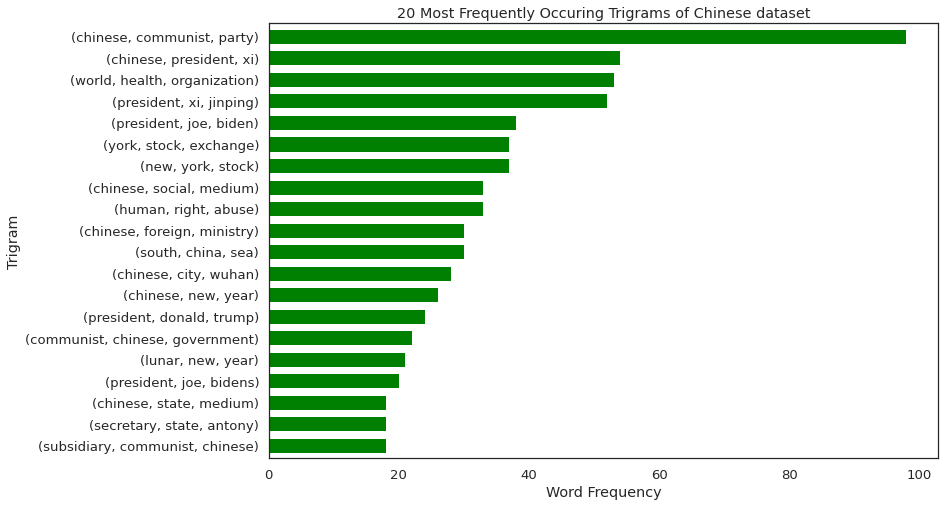

In [ ]:
chinese_trigrams_series.sort_values().plot.barh(color='green', width=.7, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams of Chinese dataset')
plt.ylabel('Trigram')
plt.xlabel('Word Frequency')

## Top common words

In [ ]:
#cleaning the texts
import re
chinese_corpus=[]
for i in range(len(chinese)):
    review=re.sub('[^a-zA-Z0-9]',' ',chinese['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    review=' '.join(review)
    chinese_corpus.append(review)



In [ ]:
common_word_df2 = pd.DataFrame(chinese_corpus, columns =['message']) 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.ylabel('word')
    plt.xlabel('Word Frequency')
    plt.show()

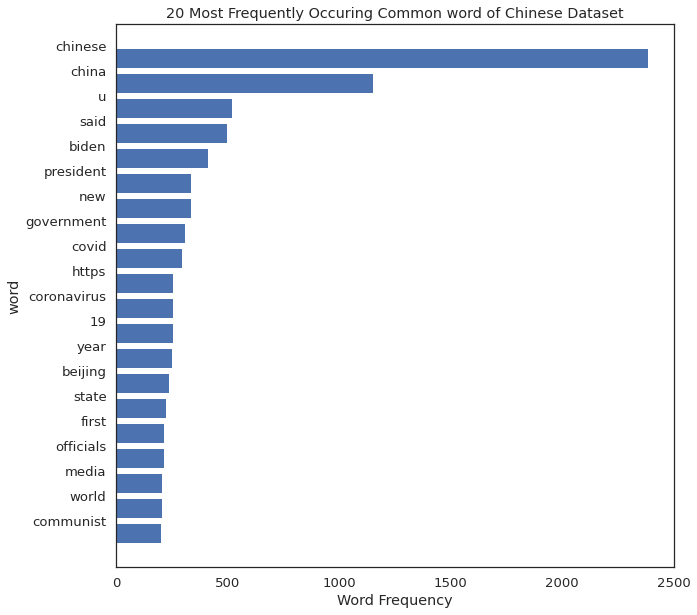

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(common_word_df2,'message',"20 Most Frequently Occuring Common word of Chinese Dataset")